## Part A - 30 Marks

### DOMAIN: Botanical Research

### CONTEXT:
####                   University X is currently undergoing some research involving understanding the characteristics of plant and plant seedlings at various stages of growth. They already have have invested on curating sample images. They require an automation which can create a classi ier capable of determining a plant's species from a photo

### DATA DESCRIPTION: The dataset comprises of images from 12 plant species. Source: https://www.kaggle.com/c/plant-seedlings-classi ication/data.

### PROJECT OBJECTIVE: To create a classifier capable of determining a plant's species from a photo

### Steps and tasks: [ Total Score: 30 Marks]

### 1. Import and Understand the data [12 Marks]

#### A. Extract ‘plant-seedlings-classification.zip’ into new folder (unzipped) using python. [2 Marks]



In [1]:
import shutil
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.layers
from tensorflow.keras import utils
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
import sklearn
from sklearn.model_selection import train_test_split
import gc
from sklearn.ensemble import RandomForestClassifier

In [2]:
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
from google.colab import drive
drive.mount("/content/gdrive/")

Mounted at /content/gdrive/


In [ ]:
shutil.unpack_archive("/content/gdrive/MyDrive/AIML/Projects/10 Computer Vision/Project 01/plant-seedlings-classification.zip", "./")

In [ ]:
!ls

gdrive	__MACOSX  plant-seedlings-classification  sample_data


In [ ]:
# removing unnecessary macOS stuff

!rm -r ./__MACOSX/
!rm ./plant-seedlings-classification/train/.DS_Store

#### B. Map the images from train folder with train labels to form a DataFrame. [6 Marks]

In [ ]:
!ls ./plant-seedlings-classification/train/


 Black-grass	    'Common wheat'	'Scentless Mayweed'
 Charlock	    'Fat Hen'		'Shepherds Purse'
 Cleavers	    'Loose Silky-bent'	'Small-flowered Cranesbill'
'Common Chickweed'   Maize		'Sugar beet'


In [ ]:
image_dir_path = './plant-seedlings-classification/train/'
data = pd.DataFrame(columns=["path", "plant"])

In [ ]:
data.head()


,path,plant


In [ ]:
paths = Path(image_dir_path).rglob("*.png")

In [ ]:
import warnings

warnings.filterwarnings("ignore")
for path in paths:
    data = data.append(
            {
                "path" : path,
                "plant" : path.parts[-2]
            },
        ignore_index = True
    )

In [ ]:
data.shape

(4750, 2)

In [ ]:
data["plant"].unique()

array(['Scentless Mayweed', 'Common Chickweed', 'Maize',
       'Small-flowered Cranesbill', 'Fat Hen', 'Loose Silky-bent',
       'Charlock', 'Common wheat', 'Shepherds Purse', 'Cleavers',
       'Black-grass', 'Sugar beet'], dtype=object)

In [ ]:
data.head()

,path,plant
0,plant-seedlings-classification/train/Scentless...,Scentless Mayweed
1,plant-seedlings-classification/train/Scentless...,Scentless Mayweed
2,plant-seedlings-classification/train/Scentless...,Scentless Mayweed
3,plant-seedlings-classification/train/Scentless...,Scentless Mayweed
4,plant-seedlings-classification/train/Scentless...,Scentless Mayweed


#### C. Write a function that will select n random images and display images along with its species. [4 Marks]

In [ ]:
def display_random_images(dataset, num_images = 5):
    data = dataset.sample(num_images)
    fig, axes = plt.subplots(num_images, **{"figsize" : (20, 20)})
    for index, axis in enumerate(axes):
        axis.imshow(utils.load_img(data["path"].iloc[index]))
        axis.annotate(data["plant"].iloc[index], xy = (20, 20), **{"color" : "red"})

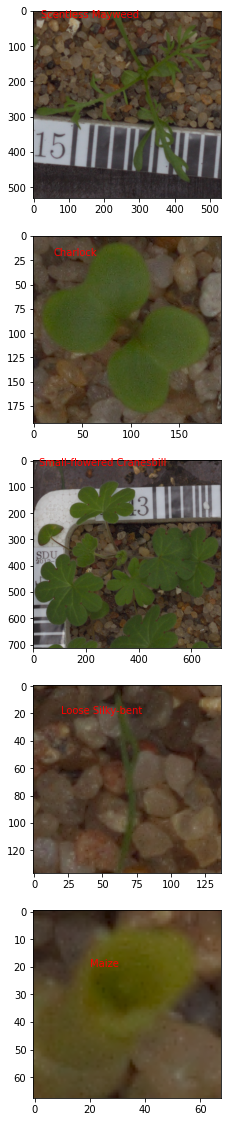

In [ ]:
display_random_images(data)

### 2. Data preprocessing [8 Marks]

#### A. Create X & Y from the DataFrame. [2 Marks]

In [ ]:
X = data["path"]
Y = data["plant"]


In [ ]:
print(X.shape)
print(X)

(4750,)
0       plant-seedlings-classification/train/Scentless...
1       plant-seedlings-classification/train/Scentless...
2       plant-seedlings-classification/train/Scentless...
3       plant-seedlings-classification/train/Scentless...
4       plant-seedlings-classification/train/Scentless...
                              ...                        
4745    plant-seedlings-classification/train/Sugar bee...
4746    plant-seedlings-classification/train/Sugar bee...
4747    plant-seedlings-classification/train/Sugar bee...
4748    plant-seedlings-classification/train/Sugar bee...
4749    plant-seedlings-classification/train/Sugar bee...
Name: path, Length: 4750, dtype: object


In [ ]:
print(Y.shape)
print(Y)

(4750,)
0       Scentless Mayweed
1       Scentless Mayweed
2       Scentless Mayweed
3       Scentless Mayweed
4       Scentless Mayweed
              ...        
4745           Sugar beet
4746           Sugar beet
4747           Sugar beet
4748           Sugar beet
4749           Sugar beet
Name: plant, Length: 4750, dtype: object


#### B. Encode labels of the images. [2 Marks]

In [ ]:
Y = pd.Categorical(Y)

In [ ]:
Y = utils.to_categorical(Y.codes)

#### C. Unify shape of all the images. [2 Marks]

In [ ]:
def extract_array_from_img(img_path, size):
    img = utils.load_img(img_path, target_size = size)
    array = utils.img_to_array(img)
    del img
    #gc.collect()
    return array

In [ ]:
X = data["path"].apply(lambda x : extract_array_from_img(x, size = (112, 112)))
final_x = X.to_numpy()
del X
gc.collect()

11267

#### D. Normalise all the images. [2 Marks]

In [ ]:
x = np.zeros(shape = (4750, 112, 112, 3))

In [ ]:
for index, img_array in enumerate(final_x):
    x[index] = final_x[index]

In [ ]:
x = (x - x.mean()) / x.std()

In [ ]:
del final_x
gc.collect()

200

In [ ]:
del data
gc.collect()

50

### 3. Model training [10 Marks]

#### A. Split the data into train and test data. [2 Marks]

In [ ]:
assert(x.shape == (4750, 112, 112, 3))

In [ ]:
train_data, test_data, train_labels, test_labels = sklearn.model_selection.train_test_split(x, Y,test_size = 0.25)

#### I'm getting too many OutOfMemory errors while doing computations so I'll be saving these arrays and restarting the kernel hoping I'm able to train the models peacefully

In [ ]:
np.save("train_data", train_data)
np.save("test_data", test_data)
np.save("train_labels", train_labels)
np.save("test_labels", test_labels)

In [ ]:
x_train = np.load("./train_data.npy")
x_test = np.load("./test_data.npy")
y_train =  np.load("./train_labels.npy")
y_test = np.load("./test_labels.npy")

print(f"x_train.shape: {x_train.shape}\nx_test.shape: {x_test.shape}\ny_train.shape: {y_train.shape}\ny_test.shape: {y_test.shape}")

x_train.shape: (3562, 112, 112, 3)
x_test.shape: (1188, 112, 112, 3)
y_train.shape: (3562, 12)
y_test.shape: (1188, 12)


#### B. Create new CNN architecture to train the model. [4 Marks]

In [ ]:
inputs = keras.layers.Input(shape = (112, 112, 3))
features = keras.layers.Conv2D(32, 3, activation = "relu")(inputs)
features = keras.layers.Conv2D(64, 3, activation = "relu")(features)
features = keras.layers.MaxPooling2D(2)(features)
features = keras.layers.Conv2D(128, 3, activation = "relu")(features)
features = keras.layers.MaxPooling2D(2)(features)
features = keras.layers.Conv2D(256, 3, activation = "relu")(features)
features = keras.layers.MaxPooling2D(2)(features)
features = keras.layers.Flatten()(features)
features = keras.layers.Dropout(0.5)(features)
outputs = keras.layers.Dense(12, activation = "softmax")(features)

In [ ]:
nn = keras.Model(inputs = inputs, outputs = outputs)

In [ ]:
nn.compile(
    loss = keras.losses.CategoricalCrossentropy(),
    metrics = ["accuracy"],
    optimizer = keras.optimizers.RMSprop(learning_rate = 0.005)
)

#### C. Train the model on train data and validate on test data. [2 Marks]

In [ ]:
hist = nn.fit(
    x = x_train,
    y = y_train,
    validation_data = (x_test, y_test),
    callbacks = [
        keras.callbacks.ModelCheckpoint(save_best_only = True, monitor = "val_loss", filepath = "./best.keras")
    ],
    batch_size = 16,
    epochs = 20
)

Epoch 1/20
223/223 [==============================] - 20s 31ms/step - loss: 5.3708 - accuracy: 0.2878 - val_loss: 1.8609 - val_accuracy: 0.2938
Epoch 2/20
223/223 [==============================] - 5s 24ms/step - loss: 1.6424 - accuracy: 0.4672 - val_loss: 1.4346 - val_accuracy: 0.5202
Epoch 3/20
223/223 [==============================] - 5s 24ms/step - loss: 1.1885 - accuracy: 0.6047 - val_loss: 1.2115 - val_accuracy: 0.5707
Epoch 4/20
223/223 [==============================] - 6s 27ms/step - loss: 1.0343 - accuracy: 0.6850 - val_loss: 1.0292 - val_accuracy: 0.7029
Epoch 5/20
223/223 [==============================] - 5s 24ms/step - loss: 0.8194 - accuracy: 0.7395 - val_loss: 1.1443 - val_accuracy: 0.6633
Epoch 6/20
223/223 [==============================] - 6s 26ms/step - loss: 0.8205 - accuracy: 0.7664 - val_loss: 0.8257 - val_accuracy: 0.7677
Epoch 7/20
223/223 [==============================] - 5s 24ms/step - loss: 0.7791 - accuracy: 0.7810 - val_loss: 0.8824 - val_accuracy: 0.742

#### D. Select a random image and print actual label and predicted label for the same. [2 Marks]

In [ ]:
pred = nn.predict(x_test[np.newaxis,67])


In [ ]:
np.argmax(pred)

6

In [ ]:
np.argmax(y_test[147])

7

## Part B - 30 Marks

### DOMAIN: Botanical Research


### CONTEXT: University X is currently undergoing some research involving understanding the characteristics of lowers. They already have have invested on curating sample images. They require an automation which can create a classi ier capable of determining a lower’s species from a photo.

### DATA DESCRIPTION: The dataset comprises of images from 17 plant species.

### PROJECT OBJECTIVE: To experiment with various approaches to train an image classi ier to predict type of lower from the image

### Steps and tasks: [ Total Score: 30 Marks]

### 1. Import and Understand the data [5 Marks]

#### A. Import and read oxflower17 dataset from tflearn and split into X and Y while loading. [2 Marks]



In [4]:
!pip install tflearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 107 kB 5.1 MB/s 
  Created wheel for tflearn: filename=tflearn-0.5.0-py3-none-any.whl size=127299 sha256=47b6fbe75d3721f4956173fb7168f1f3c505b18194eaa21addd2e77d8b00363a
  Stored in directory: /root/.cache/pip/wheels/5f/14/2e/1d8e28cc47a5a931a2fb82438c9e37ef9246cc6a3774520271
Successfully built tflearn


In [5]:
import tflearn.datasets.oxflower17 as oxflower17

X, y = oxflower17.load_data(one_hot=True, resize_pics=(112, 112))

Instructions for updating:
non-resource variables are not supported in the long term


100.0% 60276736 / 60270631


Succesfully downloaded 17flowers.tgz 60270631 bytes.
File Extracted
Starting to parse images...
Parsing Done!


#### B. Print Number of images and shape of the images. [1 Marks]

In [6]:
print(X.shape)

(1360, 112, 112, 3)


#### C. Print count of each class from y. [2 Marks]

In [7]:
np.unique(y, axis = 0, return_counts = True)

(array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
         0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
         0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
         0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0.

### 2. Image Exploration & Transformation [Learning purpose - Not related to final model] [10 Marks]

#### A. Display 5 random images. [1 Marks]

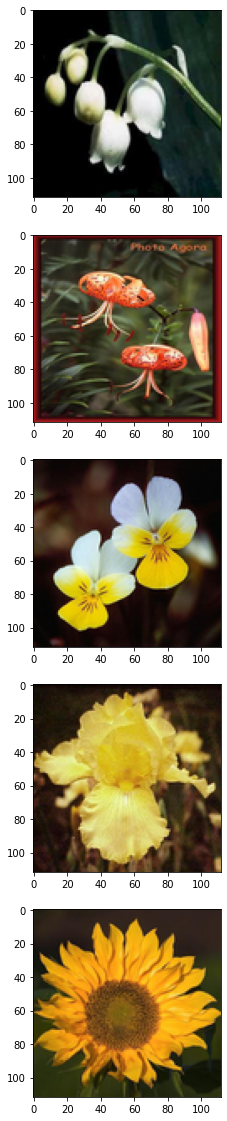

In [8]:
random_indices = np.random.randint(0, 1360, size = 5)

fig, axes = plt.subplots(5, figsize = (20, 20))
for index, axis in enumerate(axes):
    axis.imshow(utils.array_to_img(X[random_indices[index]]))

#### B. Select any image from the dataset and assign it to a variable. [1 Marks]

In [9]:
img = X[345]
img.shape

(112, 112, 3)

In [10]:
img

array([[[0.32156864, 0.36862746, 0.32941177],
        [0.32941177, 0.3647059 , 0.31764707],
        [0.32941177, 0.34901962, 0.29803923],
        ...,
        [0.2784314 , 0.36078432, 0.5294118 ],
        [0.23921569, 0.29411766, 0.44313726],
        [0.1764706 , 0.2509804 , 0.37254903]],

       [[0.32941177, 0.3764706 , 0.3372549 ],
        [0.33333334, 0.36862746, 0.32156864],
        [0.33333334, 0.35686275, 0.30588236],
        ...,
        [0.30980393, 0.4       , 0.57254905],
        [0.27058825, 0.32941177, 0.4862745 ],
        [0.1882353 , 0.27058825, 0.4       ]],

       [[0.32156864, 0.36862746, 0.32941177],
        [0.32941177, 0.3647059 , 0.31764707],
        [0.3254902 , 0.34509805, 0.29411766],
        ...,
        [0.34509805, 0.44705883, 0.627451  ],
        [0.29411766, 0.3647059 , 0.53333336],
        [0.19215687, 0.28235295, 0.42352942]],

       ...,

       [[0.18039216, 0.2901961 , 0.08627451],
        [0.14901961, 0.23137255, 0.15294118],
        [0.14509805, 0

#### C. Transform the image into grayscale format and display the same. [3 Marks]

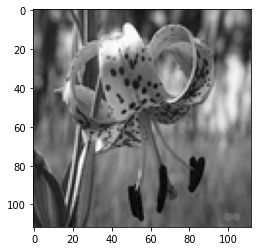

In [11]:
plt.imshow(img.mean(axis = - 1), cmap = "gray")

#### D. Apply a filter to sharpen the image and display the image before and after sharpening. [2 Marks]

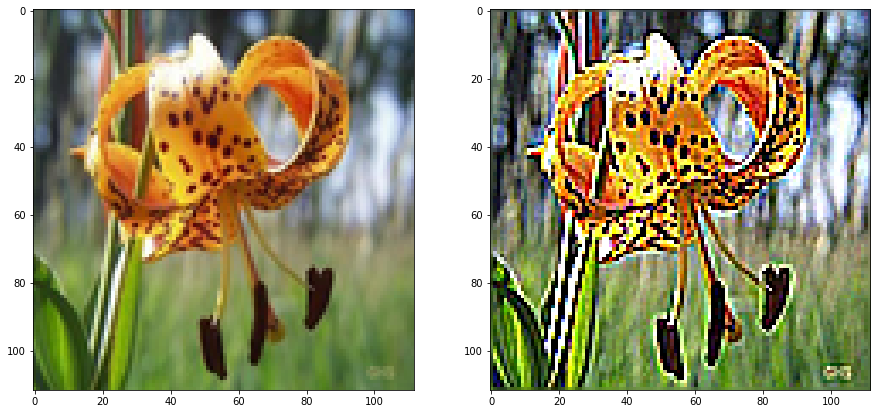

In [12]:
from PIL import Image, ImageEnhance



image = Image.fromarray(np.uint8(img * 255)).convert('RGB')
image = ImageEnhance.Sharpness(image)

sharpened_image = image.enhance(factor = 10)
fig, axes = plt.subplots(ncols=2, figsize = (15, 15))
axes[0].imshow(utils.array_to_img(img))
axes[1].imshow(utils.array_to_img(sharpened_image))

#### E. Apply a ilter to blur the image and display the image before and after blur. [2 Marks]

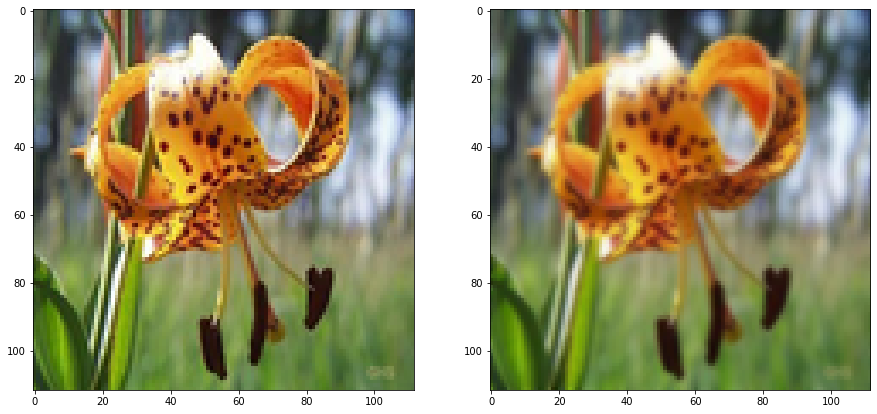

In [13]:
blurred_image = image.enhance(factor = 0.01)
fig, axes = plt.subplots(ncols=2, figsize = (15, 15))
axes[0].imshow(utils.array_to_img(img))
axes[1].imshow(utils.array_to_img(blurred_image))

#### F. Display all the 4 images from above questions besides each other to observe the difference. [1 Marks]

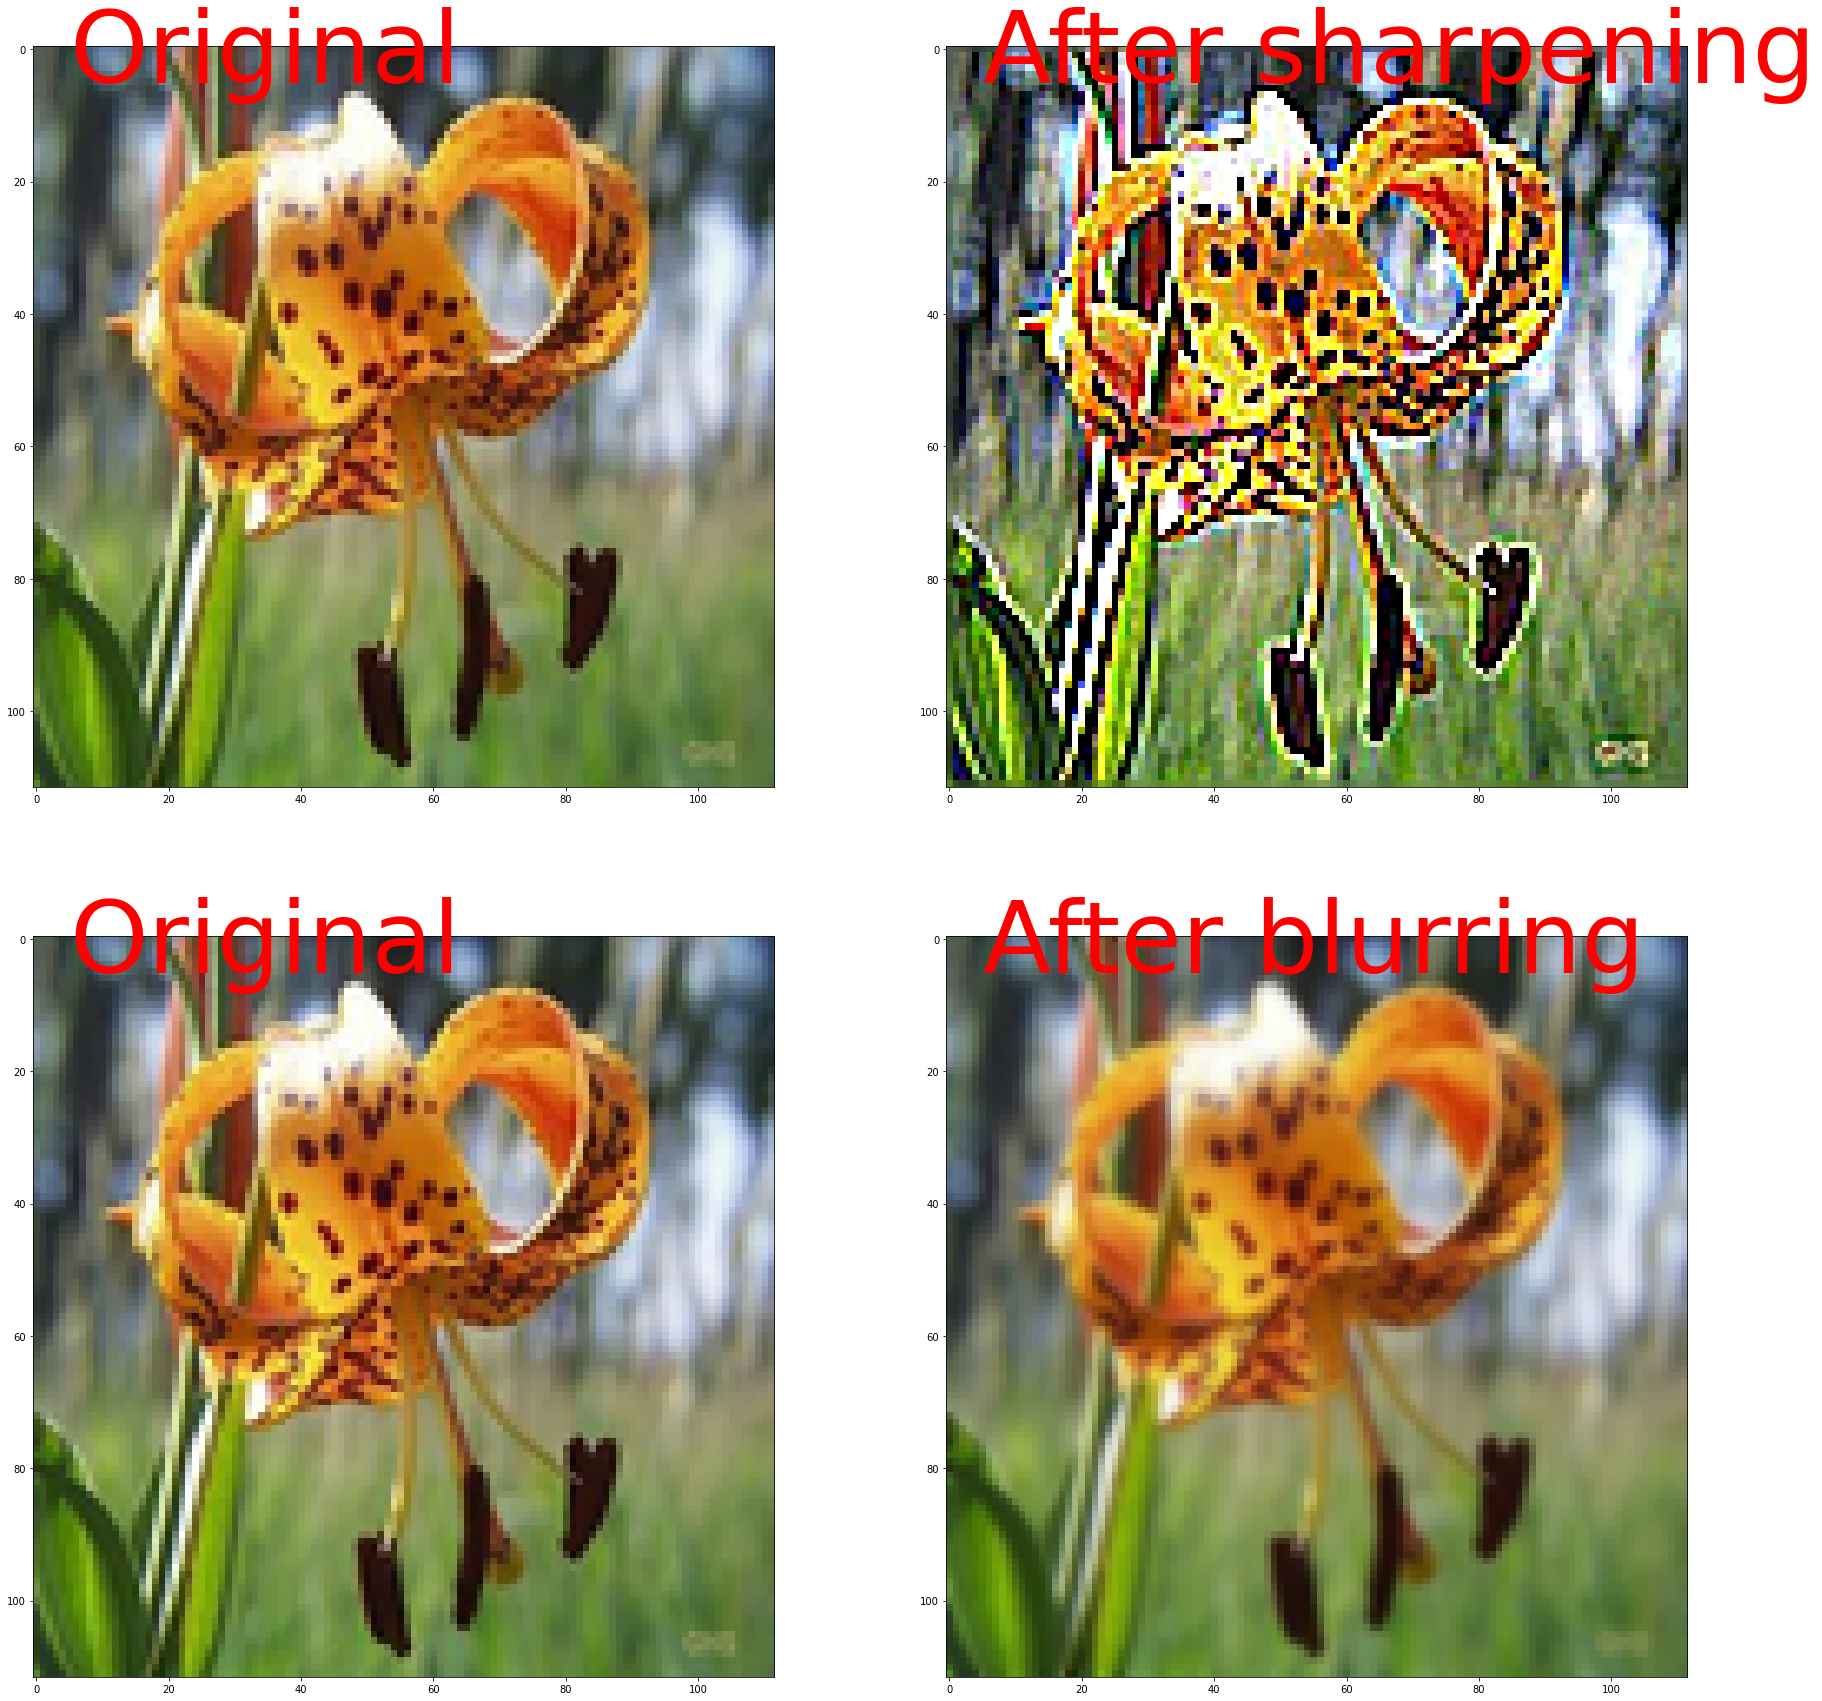

In [14]:
fig, axes = plt.subplots(nrows= 2, ncols = 2, figsize = (30, 30))

axes[0][0].imshow(utils.array_to_img(img))
axes[0][0].annotate("Original", xy = (5, 5), fontsize = 100, **{"color" : "red"})
axes[0][1].imshow(utils.array_to_img(sharpened_image))
axes[0][1].annotate("After sharpening", xy = (5, 5), fontsize = 100,  **{"color" : "red"})
axes[1][0].imshow(utils.array_to_img(img))
axes[1][0].annotate("Original", xy = (5, 5), fontsize = 100,  **{"color" : "red"})
axes[1][1].imshow(utils.array_to_img(blurred_image))
axes[1][1].annotate("After blurring", xy = (5, 5), fontsize = 100,  **{"color" : "red"})
plt.show()

### 3. Model training and Tuning: [15 Marks]

#### A. Split the data into train and test with 80:20 proportion. [2 Marks]

In [15]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size = 0.2)

#### B. Train a model using any Supervised Learning algorithm and share performance metrics on test data. [3 Marks]

In [16]:
np.save("train_data_2", X_train_2)
np.save("test_data_2", X_test_2)
np.save("train_labels_2", y_train_2)
np.save("test_labels_2", y_test_2)

In [17]:
x_train_2 = np.load("./train_data_2.npy")
x_test_2 = np.load("./test_data_2.npy")
y_train_2 =  np.load("./train_labels_2.npy")
y_test_2 = np.load("./test_labels_2.npy")

print(f"x_train.shape: {x_train_2.shape}\nx_test.shape: {x_test_2.shape}\ny_train.shape: {y_train_2.shape}\ny_test.shape: {y_test_2.shape}")

x_train.shape: (1088, 112, 112, 3)
x_test.shape: (272, 112, 112, 3)
y_train.shape: (1088, 17)
y_test.shape: (272, 17)


In [18]:
rf = RandomForestClassifier(n_estimators = 500, n_jobs = -1,verbose = 3)


rf.fit(x_train_2.reshape(1088, 112*112*3), y_train_2)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 500
building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    5.8s


building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
building tree 43 of 500
building tree 44 of 500
building tree 45 of 500
building tree 46 of 500
building tree 47 of 500
building tree 48 of 500
building tree 49 of 500
building tree 50 of 500
building tree 51 of 500
building tree 52 of 500
building tree 53 of 500
building tree 54 of 500
building tree 55 of 500
building tree 56 of 500
building tree 57 of 500
building tree 58 of 500
building tree 59 of 500
building tree 60 of 500
building tree 61 of 500
building tree 62 of 500
building tree 63 of 500
building tree 64 of 500
building tree 65 of 500
building tree 66 of 500
building tree 67 of 500
building tree 68 of 500
building tree 69 of 500
building tree 70 of 500
building tree 71 of 500
building tree 72

[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   48.1s


building tree 126 of 500
building tree 127 of 500
building tree 128 of 500
building tree 129 of 500
building tree 130 of 500
building tree 131 of 500
building tree 132 of 500
building tree 133 of 500
building tree 134 of 500
building tree 135 of 500
building tree 136 of 500
building tree 137 of 500
building tree 138 of 500
building tree 139 of 500
building tree 140 of 500
building tree 141 of 500
building tree 142 of 500
building tree 143 of 500
building tree 144 of 500
building tree 145 of 500
building tree 146 of 500
building tree 147 of 500
building tree 148 of 500
building tree 149 of 500
building tree 150 of 500
building tree 151 of 500
building tree 152 of 500
building tree 153 of 500
building tree 154 of 500
building tree 155 of 500
building tree 156 of 500
building tree 157 of 500
building tree 158 of 500
building tree 159 of 500
building tree 160 of 500
building tree 161 of 500
building tree 162 of 500
building tree 163 of 500
building tree 164 of 500
building tree 165 of 500


[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:  1.3min


building tree 286 of 500
building tree 287 of 500
building tree 288 of 500
building tree 289 of 500
building tree 290 of 500
building tree 291 of 500
building tree 292 of 500
building tree 293 of 500
building tree 294 of 500
building tree 295 of 500
building tree 296 of 500
building tree 297 of 500
building tree 298 of 500
building tree 299 of 500
building tree 300 of 500
building tree 301 of 500
building tree 302 of 500
building tree 303 of 500
building tree 304 of 500
building tree 305 of 500
building tree 306 of 500
building tree 307 of 500
building tree 308 of 500
building tree 309 of 500
building tree 310 of 500
building tree 311 of 500
building tree 312 of 500
building tree 313 of 500
building tree 314 of 500
building tree 315 of 500
building tree 316 of 500
building tree 317 of 500
building tree 318 of 500
building tree 319 of 500
building tree 320 of 500
building tree 321 of 500
building tree 322 of 500
building tree 323 of 500
building tree 324 of 500
building tree 325 of 500


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  2.1min finished


RandomForestClassifier(n_estimators=500, n_jobs=-1, verbose=3)

In [19]:
preds = rf.predict(x_test_2.reshape(272, 112*112*3))

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 284 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:    0.6s finished


In [20]:
from sklearn.metrics import classification_report


print(classification_report(y_test_2, preds))

              precision    recall  f1-score   support

           0       1.00      0.11      0.19        19
           1       0.00      0.00      0.00        14
           2       1.00      0.48      0.65        21
           3       1.00      0.16      0.27        19
           4       1.00      0.15      0.27        13
           5       0.00      0.00      0.00        13
           6       1.00      0.22      0.36        23
           7       1.00      0.07      0.12        15
           8       0.00      0.00      0.00        19
           9       0.00      0.00      0.00        11
          10       0.00      0.00      0.00        17
          11       0.00      0.00      0.00        13
          12       1.00      0.29      0.44        14
          13       0.00      0.00      0.00        15
          14       0.00      0.00      0.00        15
          15       0.00      0.00      0.00        15
          16       1.00      0.62      0.77        16

   micro avg       1.00   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### C. Train a model using Neural Network and share performance metrics on test data. [4 Marks]

In [21]:
ip = keras.layers.Input(shape = (112, 112, 3))

feat = keras.layers.Dense(32, activation = "relu")(ip)
feat = keras.layers.BatchNormalization()(feat)
feat = keras.layers.Dense(64, activation = "relu")(feat)
feat = keras.layers.BatchNormalization()(feat)
feat = keras.layers.Dense(128, activation = "relu")(feat)
feat = keras.layers.BatchNormalization()(feat)
feat = keras.layers.Dense(256, activation = "relu")(feat)
feat = keras.layers.BatchNormalization()(feat)
feat = keras.layers.Dense(32, activation = "relu")(feat)
feat = keras.layers.Flatten()(feat)
op = keras.layers.Dense(17, activation = "softmax")(feat)

Instructions for updating:
Colocations handled automatically by placer.


In [22]:
normal_nn = keras.Model(inputs = ip, outputs = op)


normal_nn.compile(
    loss = "categorical_crossentropy",
    metrics = ["accuracy"],
    optimizer = "rmsprop"
)

In [23]:
normal_nn.fit(
    x_train_2,
    y_train_2,
    epochs = 20,
    batch_size = 16,
    validation_split = 0.2,
    callbacks= [ keras.callbacks.ModelCheckpoint(filepath = "./basic_nn_part_b.keras")]
)

Train on 870 samples, validate on 218 samples
Epoch 1/20
864/870 [============================>.] - ETA: 0s - loss: 73.4269 - acc: 0.2211

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


870/870 [==============================] - 10s 12ms/sample - loss: 73.1049 - acc: 0.2218 - val_loss: 5.8317 - val_acc: 0.0596
Epoch 2/20
870/870 [==============================] - 5s 6ms/sample - loss: 12.2996 - acc: 0.4943 - val_loss: 3.5902 - val_acc: 0.0963
Epoch 3/20
870/870 [==============================] - 5s 6ms/sample - loss: 5.6584 - acc: 0.7057 - val_loss: 2.8983 - val_acc: 0.0780
Epoch 4/20
870/870 [==============================] - 5s 6ms/sample - loss: 3.3822 - acc: 0.8115 - val_loss: 17.3898 - val_acc: 0.0872
Epoch 5/20
870/870 [==============================] - 5s 6ms/sample - loss: 2.8897 - acc: 0.8552 - val_loss: 16.1683 - val_acc: 0.0826
Epoch 6/20
870/870 [==============================] - 5s 6ms/sample - loss: 2.1080 - acc: 0.9218 - val_loss: 20.2020 - val_acc: 0.1606
Epoch 7/20
870/870 [==============================] - 5s 6ms/sample - loss: 1.1855 - acc: 0.9310 - val_loss: 35.4209 - val_acc: 0.2018
Epoch 8/20
870/870 [==============================] - 5s 6ms/samp

In [24]:
preds_basic_nn = normal_nn.predict(x_test_2)


print(classification_report(y_test_2.argmax(axis = 1), preds_basic_nn.argmax(axis = 1)))

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


              precision    recall  f1-score   support

           0       0.28      0.47      0.35        19
           1       0.27      0.43      0.33        14
           2       0.58      0.86      0.69        21
           3       0.55      0.32      0.40        19
           4       0.40      0.31      0.35        13
           5       0.60      0.23      0.33        13
           6       0.52      0.48      0.50        23
           7       0.58      0.47      0.52        15
           8       0.61      0.74      0.67        19
           9       0.45      0.45      0.45        11
          10       0.47      0.47      0.47        17
          11       0.22      0.31      0.26        13
          12       0.64      0.64      0.64        14
          13       0.60      0.60      0.60        15
          14       0.00      0.00      0.00        15
          15       0.82      0.60      0.69        15
          16       0.82      0.88      0.85        16

    accuracy              

#### D. Train a model using a basic CNN and share performance metrics on test data. [4 Marks]

In [25]:
inputs = keras.layers.Input(shape = (112, 112, 3))
features = keras.layers.Conv2D(32, 3, activation = "relu")(inputs)
features = keras.layers.Conv2D(64, 3, activation = "relu")(features)
features = keras.layers.MaxPooling2D(2)(features)
features = keras.layers.Conv2D(128, 3, activation = "relu")(features)
features = keras.layers.MaxPooling2D(2)(features)
features = keras.layers.Conv2D(256, 3, activation = "relu")(features)
features = keras.layers.MaxPooling2D(2)(features)
features = keras.layers.Conv2D(512, 3, activation = "relu")(features)
features = keras.layers.MaxPooling2D(2)(features)
features = keras.layers.Conv2D(64, 3, activation = "relu")(features)
features = keras.layers.MaxPooling2D(2)(features)
features = keras.layers.Flatten()(features)
features = keras.layers.Dropout(0.5)(features)
outputs = keras.layers.Dense(17, activation = "softmax")(features)

In [26]:
conv_nn = keras.Model(inputs = inputs, outputs = outputs)

In [27]:
conv_nn.compile(
    optimizer = "rmsprop",
    metrics = ["accuracy"],
    loss = "categorical_crossentropy"
)

In [28]:
conv_nn.fit(
    x_train_2,
    y_train_2,
    validation_split = 0.2,
    epochs = 20,
    batch_size = 16,
    callbacks = [keras.callbacks.ModelCheckpoint(filepath = "conv_nn_part_b.keras")]
)

Train on 870 samples, validate on 218 samples
Epoch 1/20
870/870 [==============================] - ETA: 0s - loss: 2.9888 - acc: 0.0678

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


870/870 [==============================] - 9s 11ms/sample - loss: 2.9888 - acc: 0.0678 - val_loss: 2.8106 - val_acc: 0.0872
Epoch 2/20
870/870 [==============================] - 1s 2ms/sample - loss: 2.7468 - acc: 0.1034 - val_loss: 2.6781 - val_acc: 0.1376
Epoch 3/20
870/870 [==============================] - 2s 2ms/sample - loss: 2.5795 - acc: 0.1621 - val_loss: 2.6511 - val_acc: 0.1376
Epoch 4/20
870/870 [==============================] - 2s 2ms/sample - loss: 2.3357 - acc: 0.2402 - val_loss: 2.1425 - val_acc: 0.3349
Epoch 5/20
870/870 [==============================] - 1s 2ms/sample - loss: 2.1139 - acc: 0.3057 - val_loss: 1.8020 - val_acc: 0.3578
Epoch 6/20
870/870 [==============================] - 2s 2ms/sample - loss: 2.0241 - acc: 0.3287 - val_loss: 2.2532 - val_acc: 0.2844
Epoch 7/20
870/870 [==============================] - 2s 2ms/sample - loss: 1.9249 - acc: 0.3575 - val_loss: 1.6862 - val_acc: 0.4128
Epoch 8/20
870/870 [==============================] - 2s 2ms/sample - lo

In [29]:
preds_conv_nn = conv_nn.predict(x_test_2)

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [30]:
print(classification_report(y_test_2.argmax(axis = 1), preds_conv_nn.argmax(axis = 1)))

              precision    recall  f1-score   support

           0       0.55      0.32      0.40        19
           1       0.56      0.71      0.63        14
           2       1.00      0.76      0.86        21
           3       0.33      0.53      0.41        19
           4       0.53      0.62      0.57        13
           5       0.48      0.85      0.61        13
           6       0.54      0.30      0.39        23
           7       0.72      0.87      0.79        15
           8       0.83      0.79      0.81        19
           9       0.75      0.82      0.78        11
          10       0.78      0.82      0.80        17
          11       0.64      0.69      0.67        13
          12       0.50      0.64      0.56        14
          13       1.00      0.07      0.12        15
          14       0.38      0.33      0.36        15
          15       0.65      0.73      0.69        15
          16       0.94      1.00      0.97        16

    accuracy              

#### E. Predict the class/label of image ‘Prediction.jpg’ using best performing model and share predicted label. [2 Marks]

In [32]:
sample = utils.img_to_array(utils.load_img("/content/gdrive/MyDrive/AIML/Projects/10 Computer Vision/Project 01/Prediction.jpg", target_size = (112, 112, 3)))

In [33]:
pred = conv_nn.predict(sample[np.newaxis,])

In [34]:
pred.argmax()

2